In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import glob
import xml.etree.ElementTree as ET
import cv2
from PIL import Image as im

In [2]:
def annotate(image, boxes):
    img = image.copy()
    for box in boxes:
        cv2.rectangle(img, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), 
                      color=(255,255,255), thickness=4)
    return img

def ETtree(filename_label):
    tree = ET.parse(filename_label)
    root = tree.getroot()
    boxes = []
    
    for member in root.findall('object'):
        xmin = int(member.find('bndbox').find('xmin').text)
        xmax = int(member.find('bndbox').find('xmax').text)
        ymin = int(member.find('bndbox').find('ymin').text)
        ymax = int(member.find('bndbox').find('ymax').text)
        boxes.append([xmin, ymin, xmax, ymax])
    return boxes

# Training set example images and bounding boxes

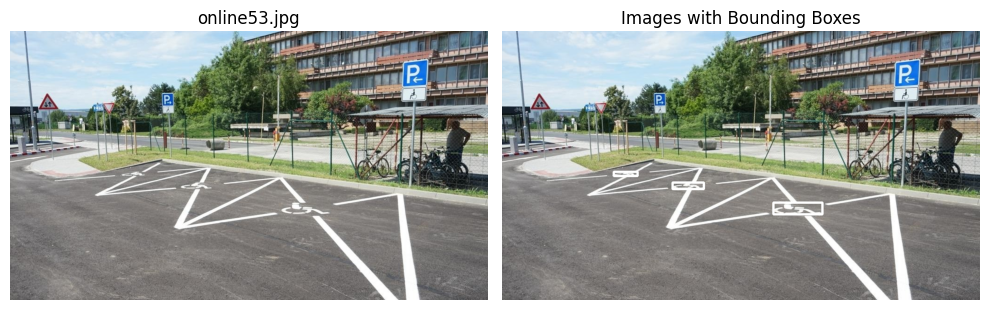

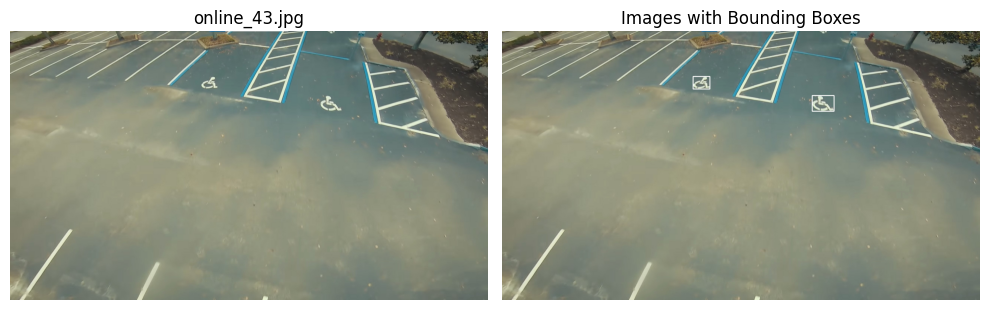

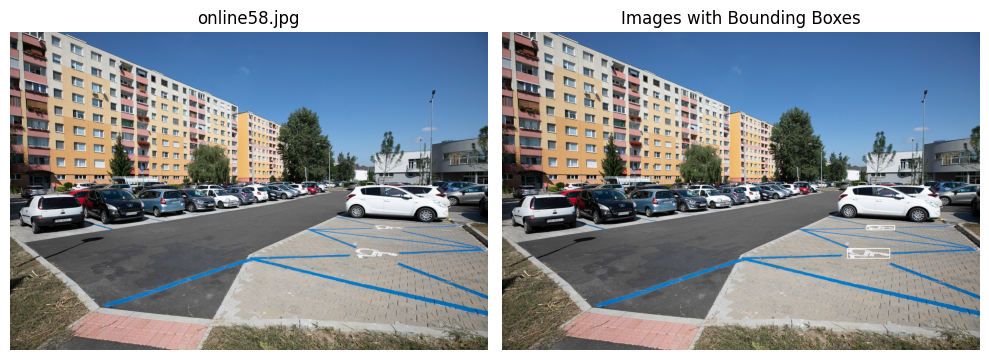

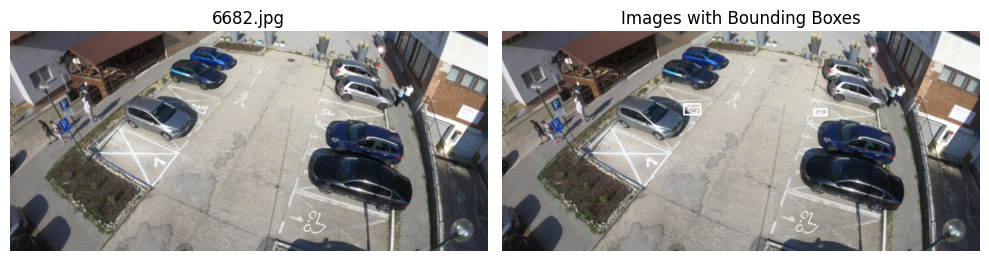

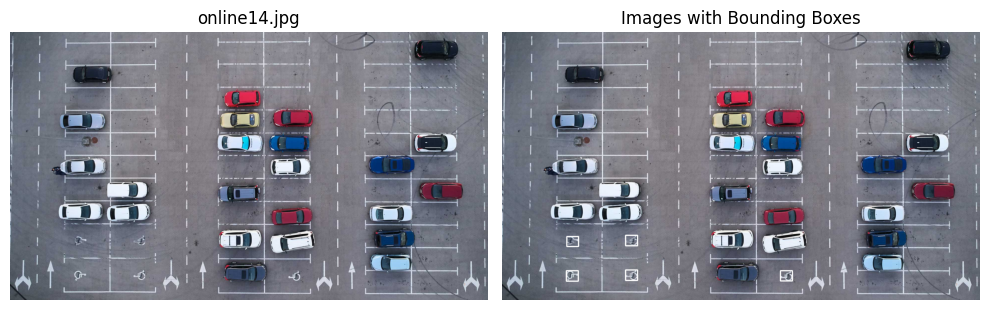

In [3]:
image_lst = glob.glob('/home/yuchen/venv/Faster_RCNN/data_sign/train_images/*.jpg')

random.seed('CS281')
random.shuffle(image_lst)
for filename_image in image_lst[:5]:
    image = cv2.imread(filename_image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    filename_label = filename_image[:46] + 'labels' + filename_image[52:-4] + '.xml'
    boxes = ETtree(filename_label)
    
    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    axes[0].axis('off')
    axes[1].axis('off')
    axes[0].imshow(image)
    axes[0].set_title(filename_image.split('/')[-1])
    axes[1].imshow(annotate(image,boxes))
    axes[1].set_title('Images with Bounding Boxes')
    plt.tight_layout()


# Validation set example images and bounding boxes

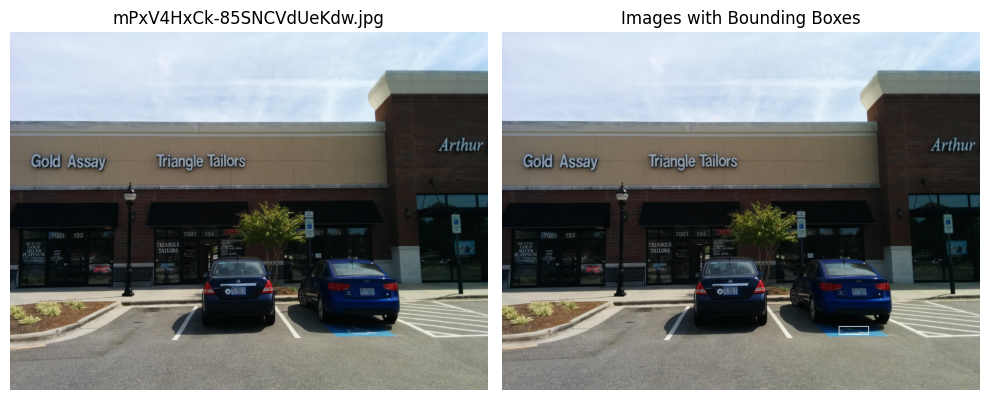

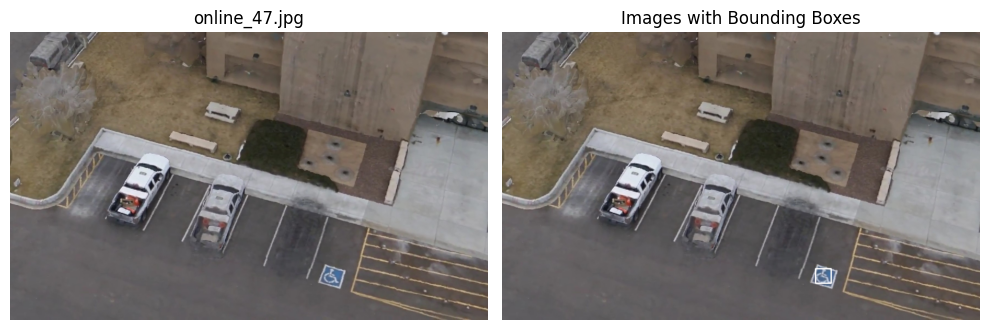

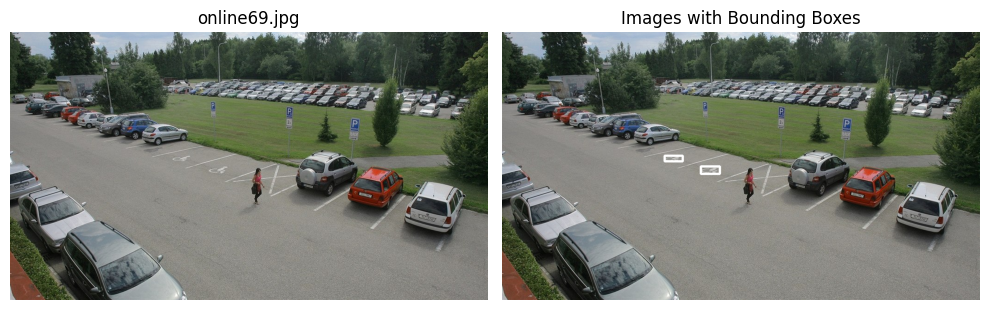

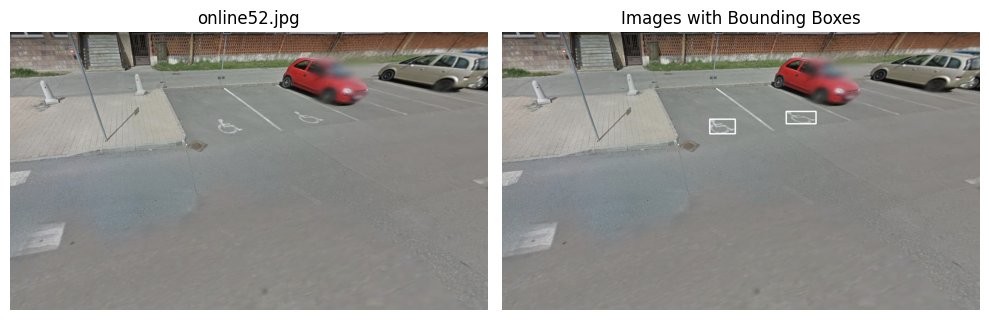

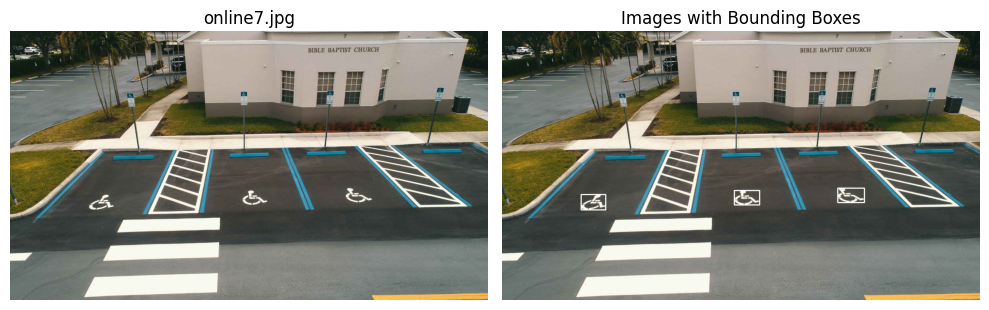

In [4]:
image_lst = glob.glob('/home/yuchen/venv/Faster_RCNN/data_sign/valid_images/*.jpg')

random.seed('CS281')
random.shuffle(image_lst)
for filename_image in image_lst[:5]:
    image = cv2.imread(filename_image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    filename_label = filename_image[:46] + 'labels' + filename_image[52:-4] + '.xml'
    boxes = ETtree(filename_label)
    
    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    axes[0].axis('off')
    axes[1].axis('off')
    axes[0].imshow(image)
    axes[0].set_title(filename_image.split('/')[-1])
    axes[1].imshow(annotate(image,boxes))
    axes[1].set_title('Images with Bounding Boxes')
    plt.tight_layout()

# Test set example images and bounding boxes

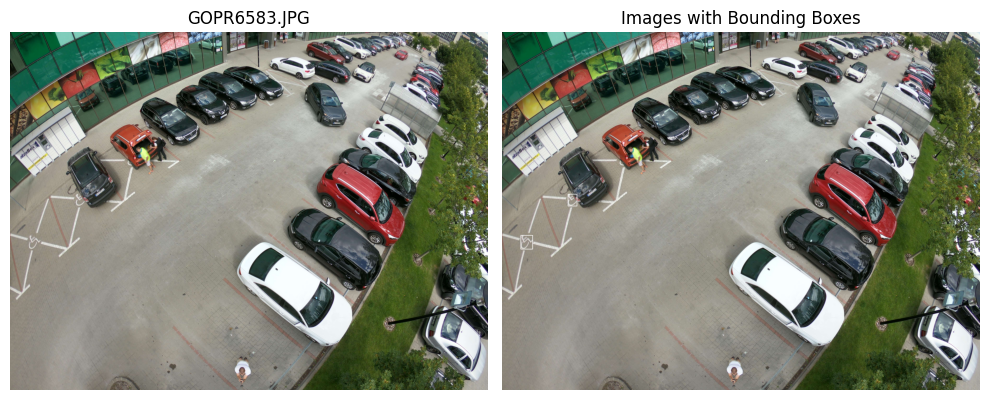

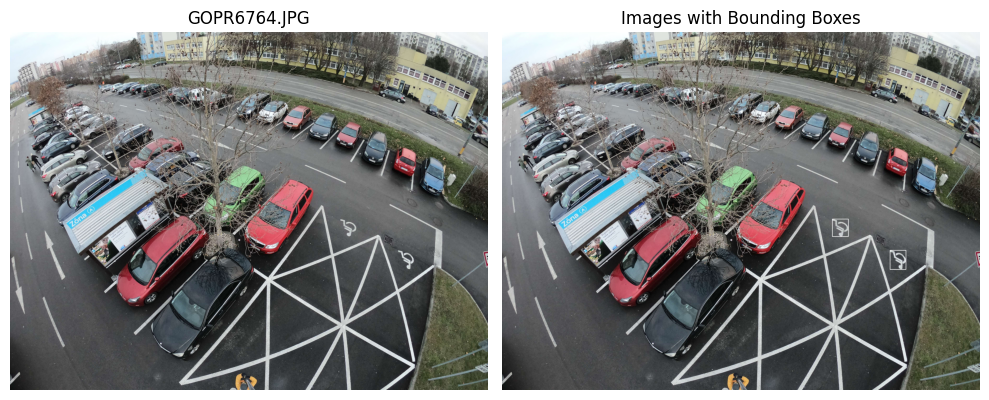

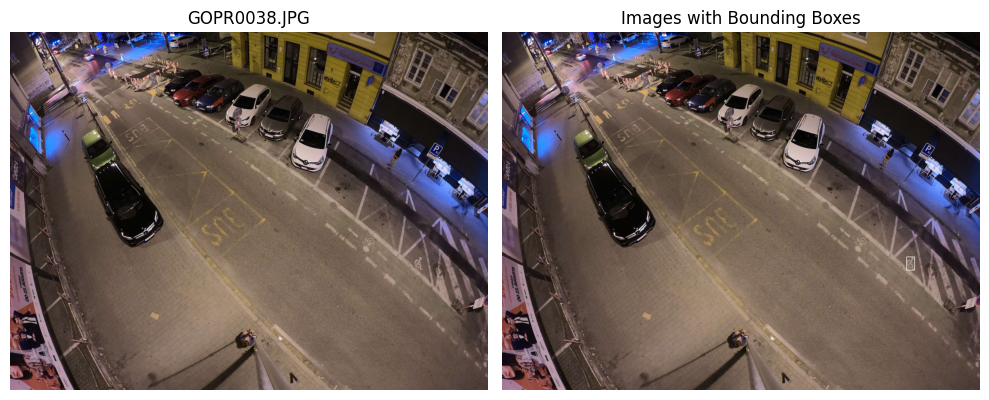

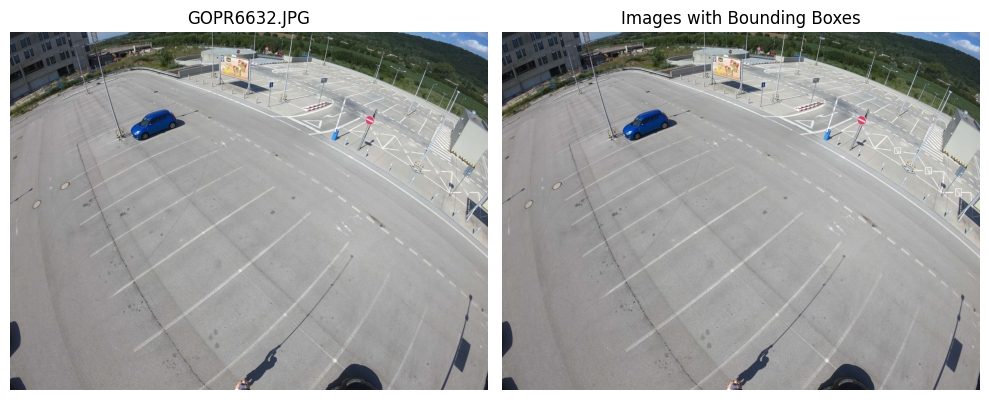

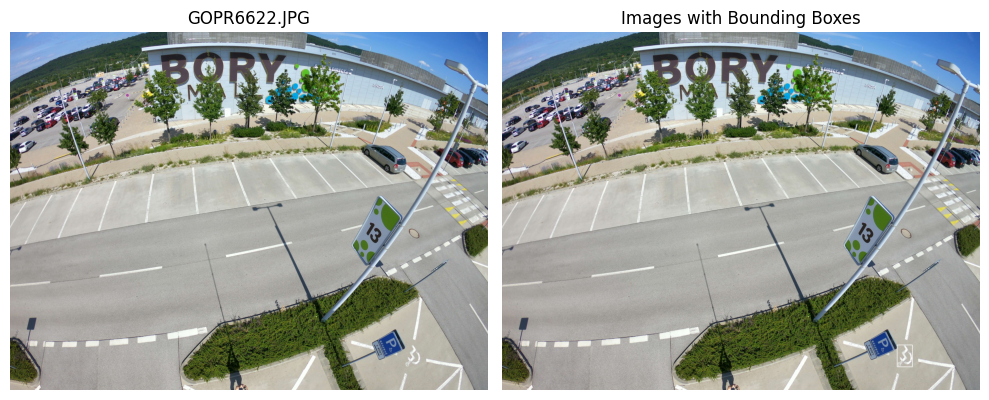

In [5]:
image_lst = glob.glob('/home/yuchen/venv/Faster_RCNN/data_sign/test_images/*.JPG')

random.seed('CS281')
random.shuffle(image_lst)
for filename_image in image_lst[:5]:
    image = cv2.imread(filename_image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    filename_label =filename_image[:45] + 'labels/' + filename_image[52:-4] + '.xml'
    boxes = ETtree(filename_label)
    
    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    axes[0].axis('off')
    axes[1].axis('off')
    axes[0].imshow(image)
    axes[0].set_title(filename_image.split('/')[-1])
    axes[1].imshow(annotate(image,boxes))
    axes[1].set_title('Images with Bounding Boxes')
    plt.tight_layout()

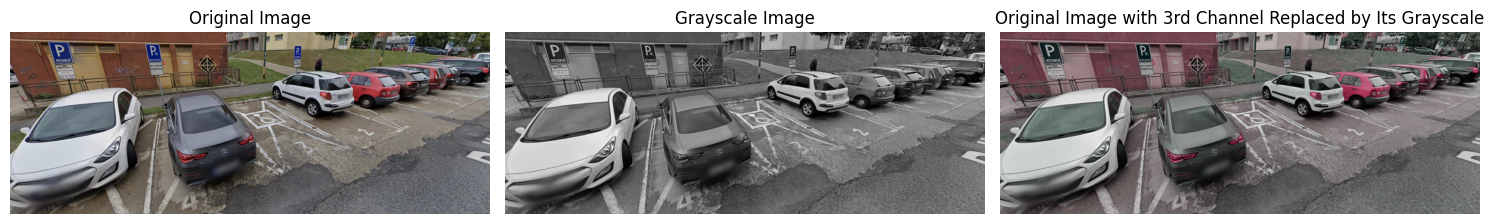

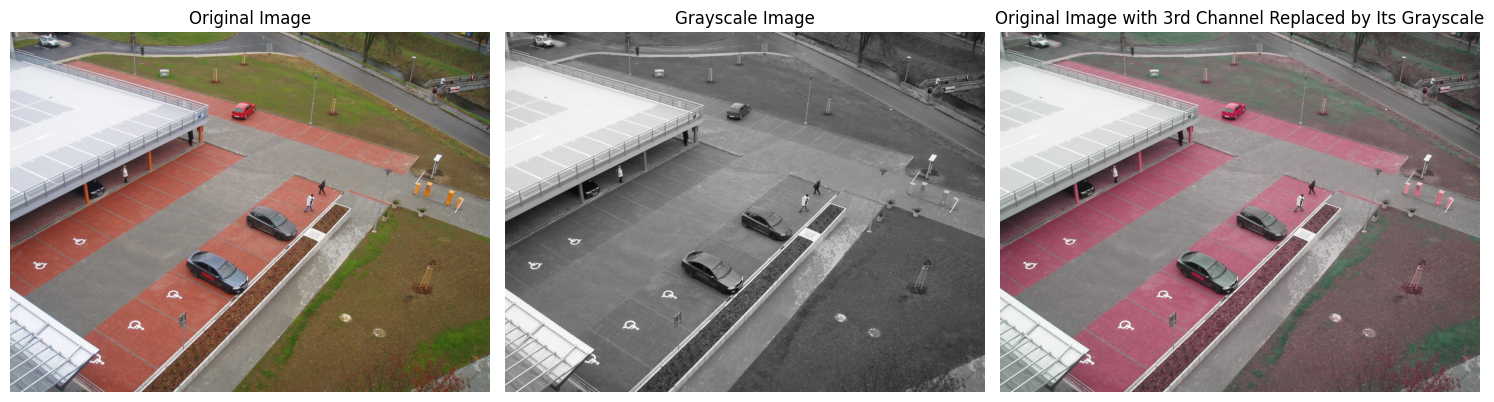

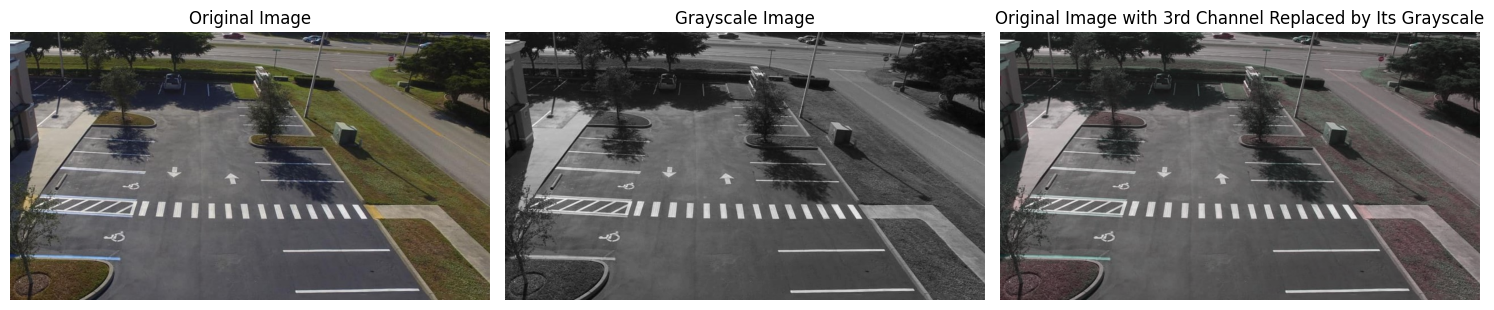

In [7]:
files = glob.glob('/home/yuchen/venv/Faster_RCNN/data_sign/train_images/*')
files.extend(glob.glob('/home/yuchen/venv/Faster_RCNN/data_sign/valid_images/*'))

random.seed('CS281')
random.shuffle(files)

for file_name in files[-3:]:
    img = np.array(im.open(file_name).copy())
    img_copy  = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
    
    fig, axes = plt.subplots(1, 3, figsize=(15,5))

    axes[0].imshow(img)
    axes[0].set_title('Original Image')
    axes[1].imshow(img_copy,cmap='gray')
    axes[1].set_title('Grayscale Image')
    
    img[:,:,-1] = img_copy
    
    axes[2].imshow(img)
    axes[2].set_title('Original Image with 3rd Channel Replaced by Its Grayscale')
    
    axes[0].axis('off')
    axes[1].axis('off')
    axes[2].axis('off')
    plt.tight_layout()
